In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Se cargan las diferentes dependencias necesarias
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython import display

In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
   # sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
   # wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

(16000,)


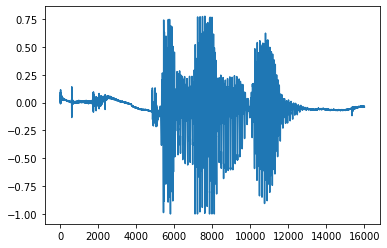

In [ ]:
# Ejemplo de carga de un archivo
RutaFile="/content/gdrive/MyDrive/Colab Notebooks/DatosProyecto3Sistemas/training/COMANDO.3hke56pe.ingestion-b4c66597b-dgzg2.s5.wav"
wave = load_wav_16k_mono(RutaFile)
print(wave.shape)
plt.plot(wave)
plt.show()



In [ ]:
def preprocess(wave): 
    #wav = wave[:32000]
    wav = wave[:16000]
    #zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
   # wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

In [ ]:
espectrograma= preprocess(wave)
print('Waveform shape:', wave.shape)
print('Spectrogram shape:', espectrograma.shape)
print('Audio playback')
display.display(display.Audio(wave, rate=16000))

Waveform shape: (16000,)
Spectrogram shape: (124, 129)
Audio playback


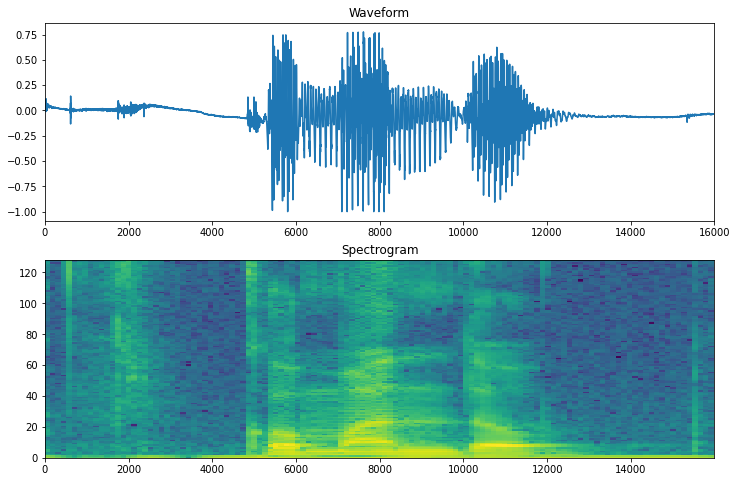

In [ ]:
def plot_spectrogram(espectrograma, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(espectrograma.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(wave.shape[0])
axes[0].plot(timescale, wave.numpy())
axes[0].set_title('Waveform')
#axes[0].set_xlim([0, 32000])
axes[0].set_xlim([0, 16000])
plot_spectrogram(espectrograma.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [ ]:
# Se cargan los diferentes archivos *.json que se van a usar en el proceso
# de entrenamiento
import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/DatosProyecto3Sistemas/training/'
files = os.listdir(directory)
files.sort() 
cantidadFiles = len(files)
# Variable donde se almacenaron los datos leidos de los archivos *.json
#Datos=np.zeros((cantidadFiles,87,129))
Datos=np.zeros((cantidadFiles,124,129))
i = 0
for file in files:
  RutaFile=directory + file
  wave = load_wav_16k_mono(RutaFile)
  espectrograma= preprocess(wave)
  Datos[i,:,:]=espectrograma
  i+=1
print(Datos.shape)
Xtrain=tf.expand_dims(Datos, axis=3)
print(Xtrain.shape)



(163, 124, 129)
(163, 124, 129, 1)


In [ ]:
YtrainIni=np.zeros((163,1))
for i in range(18):
    YtrainIni[i]=0

for i in range(18,35):  #recuerda contar los numeros de datos que tenes, clasifica las etiquetas, mira cuantas etiquetas de 
    YtrainIni[i]=1  #abrir tengo, en este caso son 15 de abrir y 10 de cerrar recuerde que debe de colocarcarse en el mismo orden
    
for i in range(35,55):
    YtrainIni[i]=2

for i in range(55,72):
    YtrainIni[i]=3

for i in range(72,89):
    YtrainIni[i]=4

for i in range(89,106):
    YtrainIni[i]=5
  
for i in range(106,123):
    YtrainIni[i]=6

for i in range(123,163):
    YtrainIni[i]=7

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]]


In [ ]:
Ytrain= keras.utils.to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 129, 8)       520       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 129, 16)      8208      
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 129, 32)      32800     
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 129, 64)      131136    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 65, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 257920)            0         
                                                        

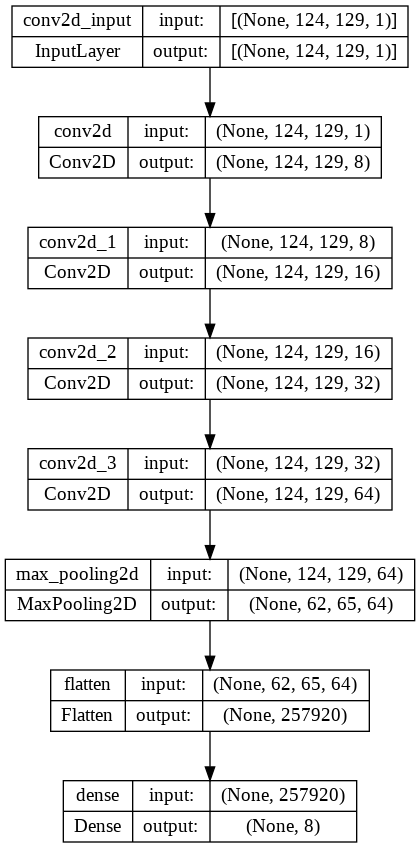

In [ ]:

#Definición del modelo
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(8, 8, activation="relu",padding="same", input_shape=(124,129,1)))
modelo.add(keras.layers.Conv2D(16, 8, activation="relu",padding="same"))
modelo.add(keras.layers.Conv2D(32, 8, activation="relu",padding="same"))
modelo.add(keras.layers.Conv2D(64, 8, activation="relu",padding="same"))
modelo.add(keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(8, activation = 'softmax'))
modelo.summary()

keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelo.fit(Xtrain,Ytrain, epochs=30,batch_size=None)


Epoch 1/30
6/6 [==============================] - 1s 84ms/step - loss: 0.0503 - accuracy: 0.9877
Epoch 2/30
6/6 [==============================] - 1s 89ms/step - loss: 0.0789 - accuracy: 0.9755
Epoch 3/30
6/6 [==============================] - 1s 89ms/step - loss: 0.1106 - accuracy: 0.9693
Epoch 4/30
6/6 [==============================] - 1s 90ms/step - loss: 0.3522 - accuracy: 0.9693
Epoch 5/30
6/6 [==============================] - 1s 91ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 1s 90ms/step - loss: 0.0553 - accuracy: 0.9877
Epoch 7/30
6/6 [==============================] - 1s 86ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 8/30
6/6 [==============================] - 1s 82ms/step - loss: 0.0071 - accuracy: 0.9939
Epoch 9/30
6/6 [==============================] - 1s 87ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/30
6/6 [==============================] - 1s 91ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 11/30
6/6 [============

6/6 [==============================] - 0s 29ms/step - loss: 2.5230e-06 - accuracy: 1.0000


[2.523033344914438e-06, 1.0]

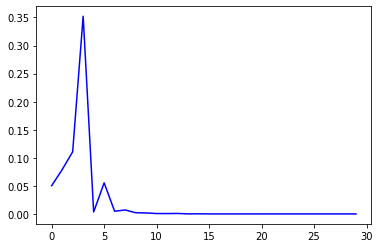

In [ ]:
plt.plot(history.history["loss"],'b')
modelo.evaluate(Xtrain, Ytrain)

In [ ]:
# Se cargan los diferentes archivos *.json que se van a usar en el proceso
# de testeo

import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/DatosProyecto3Sistemas/testing/'
files = os.listdir(directory)
files.sort() 

cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles,124,129))
i = 0
for file in files:
  RutaFile=directory + file
  wave = load_wav_16k_mono(RutaFile)
  espectrograma= preprocess(wave)
  DatosVal[i,:,:]=espectrograma
  i+=1
print(DatosVal.shape)
XVal=tf.expand_dims(DatosVal, axis=3)
print(XVal.shape)

(46, 124, 129)
(46, 124, 129, 1)


In [ ]:
YValIni=np.zeros((46,1))
for i in range(5):
    YValIni[i]=0

for i in range(5,10):
    YValIni[i]=1

for i in range(10,16):
    YValIni[i]=2 

for i in range(16,21):
    YValIni[i]=3      

for i in range(21,26):
    YValIni[i]=4  

for i in range(26,31):
    YValIni[i]=5  

for i in range(31,36):
    YValIni[i]=6  

for i in range(36,46):
    YValIni[i]=7  

print(YValIni)
YVal= keras.utils.to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]]
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0

In [ ]:
modelo.evaluate(XVal, YVal)

2/2 [==============================] - 0s 23ms/step - loss: 1.2168 - accuracy: 0.9130


[1.2168301343917847, 0.9130434989929199]

2/2 [==============================] - 0s 28ms/step
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         5
           4       0.67      0.80      0.73         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91        10

    accuracy                           0.91        46
   macro avg       0.94      0.91      0.92        46
weighted avg       0.93      0.91      0.91        46

[[ 4  0  0  0  0  0  0  1]
 [ 0  5  0  0  0  0  0  0]
 [ 0  0  4  0  2  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  0  4  0  0  1]
 [ 0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0 10]]


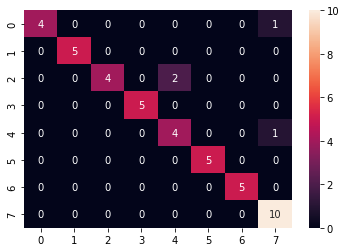

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [ ]:
# Convierta el modelo al formato TensorFlow Lite sin cuantificación
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
tflite_model = converter.convert()


# Guardar el modelo en el disco
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 8947772 bytes


In [ ]:
#La siguiente celda crea una matriz de bytes constantes que contiene el modelo TFlite. 
#Importarlo como una pestaña con el siguiente código.

!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nAbre el panel lateral (refrecar si es necesario). Doble click en model.h para descargar el archivo.")

Header file, model.h, is 55,177,962 bytes.

Abre el panel lateral (refrecar si es necesario). Doble click en model.h para descargar el archivo.
